In [1]:
import sys
import pandas as pd
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

sys.path.append(project_root)
data_dir = os.path.join(project_root, 'data')

data_file_path = os.path.join(data_dir, 'RADCURE_processed_clinical.csv')
df = pd.read_csv(data_file_path, index_col=0)

df.drop(columns=["Study ID", "survival_time"], inplace=True)

In [2]:
from jarvais.analyzer import Analyzer
from rich import print

analyzer = Analyzer(
    data=df, 
    output_dir='./outputs/analyzer',
    categorical_columns= [
      "Sex",
      "T Stage",
      "N Stage",
      "Stage",
      "Smoking Status",
      "Disease Site",
      "death",
      "HPV Combined",
      "Chemotherapy"
    ],
    continuous_columns = [
      "age at dx",
      "Dose"
    ],
    target_variable='death', 
    task='classification'
)
analyzer.encoding_module.enabled = False # AutoGluon will handle encoding

print(analyzer)

analyzer.run()

/home/joshua-siraj/Documents/CDI/jarvais/.pixi/envs/dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
12:50:06 [warning  ] Date columns not specified. Inferring from remaining columns. [jarvais] call=analyzer.__init__:76


Analyzer(
    AnalyzerSettings(
        output_dir=PosixPath('outputs/analyzer'),
        categorical_columns=[
            'Sex',
            'T Stage',
            'N Stage',
            'Stage',
            'Smoking Status',
            'Disease Site',
            'death',
            'HPV Combined',
            'Chemotherapy'
        ],
        continuous_columns=['age at dx', 'Dose'],
        date_columns=[],
        task='classification',
        target_variable='death',
        generate_report=True,
        settings_path=None,
        settings_schema_path=None,
        missingness=MissingnessModule(
            categorical_strategy={
                'Sex': 'unknown',
                'T Stage': 'unknown',
                'N Stage': 'unknown',
                'Stage': 'unknown',
                'Smoking Status': 'unknown',
                'Disease Site': 'unknown',
                'death': 'unknown',
                'HPV Combined': 'unknown',
                'Chemotherapy': 'unknown'
            },
            continuous_strategy={'age at dx': 'median', 'Dose': 'median'},
            enabled=True
        ),
        outlier=OutlierModule(
            categorical_strategy={
                'Sex': 'frequency',
                'T Stage': 'frequency',
                'N Stage': 'frequency',
                'Stage': 'frequency',
                'Smoking Status': 'frequency',
                'Disease Site': 'frequency',
                'death': 'frequency',
                'HPV Combined': 'frequency',
                'Chemotherapy': 'frequency'
            },
            continuous_strategy={'age at dx': 'none', 'Dose': 'none'},
            threshold=0.01,
            enabled=True,
            categorical_mapping={}
        ),
        encoding=OneHotEncodingModule(
            columns=[
                'Sex',
                'T Stage',
                'N Stage',
                'Stage',
                'Smoking Status',
                'Disease Site',
                'HPV Combined',
                'Chemotherapy'
            ],
            target_variable='death',
            prefix_sep='|',
            enabled=False
        ),
        visualization=VisualizationModule(
            plots=['corr', 'pairplot', 'umap', 'frequency_table', 'multiplot'],
            enabled=True
        )
    )
)

         [info     ] Performing missingness analysis... [jarvais] call=missingness.__call__:43
         [info     ] Performing outlier analysis... [jarvais] call=outlier.__call__:60
         [info     ] Plotting Correlation Matrix... [jarvais] call=visualization.__call__:115


+-----------------------+-------------------+-----------+-------------+
|                       |                   | Missing   | Overall     |
+=======================+===================+===========+=============+
| n                     |                   |           | 3346        |
+-----------------------+-------------------+-----------+-------------+
| age at dx, mean (SD)  |                   | 0         | 62.3 (11.6) |
+-----------------------+-------------------+-----------+-------------+
| Dose, mean (SD)       |                   | 0         | 66.7 (5.8)  |
+-----------------------+-------------------+-----------+-------------+
| Sex, n (%)            | Female            |           | 686 (20.5)  |
+-----------------------+-------------------+-----------+-------------+
|                       | Male              |           | 2660 (79.5) |
+-----------------------+-------------------+-----------+-------------+
| T Stage, n (%)        | None              |           | 12 (0.

         [info     ] Plotting Pairplot...           [jarvais] call=visualization.__call__:118
12:50:07 [info     ] Plotting UMAP...               [jarvais] call=visualization.__call__:124
12:50:18 [info     ] Plotting Frequency Table...    [jarvais] call=visualization.__call__:121
12:50:26 [info     ] Plotting Multiplot...          [jarvais] call=visualization.__call__:136
12:50:30 [warning  ] One-hot encoding is disabled.  [jarvais] call=encoding.__call__:40
Font MPDFAA+Inter28ptBold is missing the following glyphs: '
' (\n)


In [3]:
from jarvais.trainer import TrainerSupervised

trainer = TrainerSupervised(
    output_dir="./outputs/trainer", 
    target_variable="death", 
    task="binary",
    k_folds=2
)
    
print(trainer)

analyzer.data['death'] = analyzer.data['death'].astype(int)

trainer.run(analyzer.data)

TrainerSupervised(
    TrainerSettings(
        output_dir=PosixPath('outputs/trainer'),
        target_variable='death',
        task='binary',
        stratify_on=None,
        test_size=0.2,
        random_state=42,
        explain=False,
        reduction_module=FeatureReductionModule(method=None, task='binary', keep_k=2, enabled=True),
        trainer_module=AutogluonTabularWrapper(
            output_dir=PosixPath('outputs/trainer'),
            target_variable='death',
            task='binary',
            eval_metric='roc_auc',
            k_folds=2,
            extra_metrics=['f1', 'auprc'],
            kwargs={}
        )
    )
)

12:50:37 [info     ] Skipping feature reduction.    [jarvais] call=feature_reduction.__call__:39
         [info     ] Training fold 1/2...           [jarvais] call=autogluon_trainer._train_autogluon_with_cv:192
12:51:06 [info     ] Fold 1/2 score: 0.7761862315751399 (roc_auc) [jarvais] call=autogluon_trainer._train_autogluon_with_cv:209
         [info     ] Training fold 2/2...           [jarvais] call=autogluon_trainer._train_autogluon_with_cv:192
12:51:31 [info     ] Fold 2/2 score: 0.750053611337183 (roc_auc) [jarvais] call=autogluon_trainer._train_autogluon_with_cv:209



Model Leaderboard
----------------
+-----------------------+---------------------------+---------------------------+---------------------------+
| model                 | score_train               | score_val                 | score_test                |
+=======================+===========================+===========================+===========================+
| NeuralNetTorch        | ROC_AUC 0.79 [0.78, 0.79] | ROC_AUC 0.8 [0.78, 0.83]  | ROC_AUC 0.76 [0.75, 0.76] |
|                       | F1: 0.57 [0.56, 0.58]     | F1: 0.6 [0.57, 0.62]      | F1: 0.54 [0.52, 0.55]     |
|                       | AUPRC: 0.65 [0.64, 0.66]  | AUPRC: 0.67 [0.65, 0.69]  | AUPRC: 0.62 [0.61, 0.63]  |
+-----------------------+---------------------------+---------------------------+---------------------------+
| WeightedEnsemble_L2   | ROC_AUC 0.82 [0.81, 0.83] | ROC_AUC 0.82 [0.78, 0.87] | ROC_AUC 0.75 [0.74, 0.76] |
|                       | F1: 0.56 [0.55, 0.58]     | F1: 0.56 [0.5, 0.63]      | F1

⚠️  **Possible Bias Detected in N Stage** ⚠️

=== Subgroup Analysis for 'N Stage' Using OLS Regression ===

Model Statistics:
    R-squared:                  0.031
    F-statistic:                3.055
    F-statistic p-value:        0.0036
    AIC:                        874.42
    Log-Likelihood:             -429.21
Model Coefficients:
    +---------------+---------------+------------------+
    | Feature       |   Coefficient |   Standard Error |
    +===============+===============+==================+
    | const         |         0.457 |            0.024 |
    +---------------+---------------+------------------+
    | N Stage_N0    |         0.118 |            0.035 |
    +---------------+---------------+------------------+
    | N Stage_N1    |         0.085 |            0.055 |
    +---------------+---------------+------------------+
    | N Stage_N2    |        -0.196 |            0.071 |
    +---------------+---------------+------------------+
    | N Stage_N2a   |        -0.0

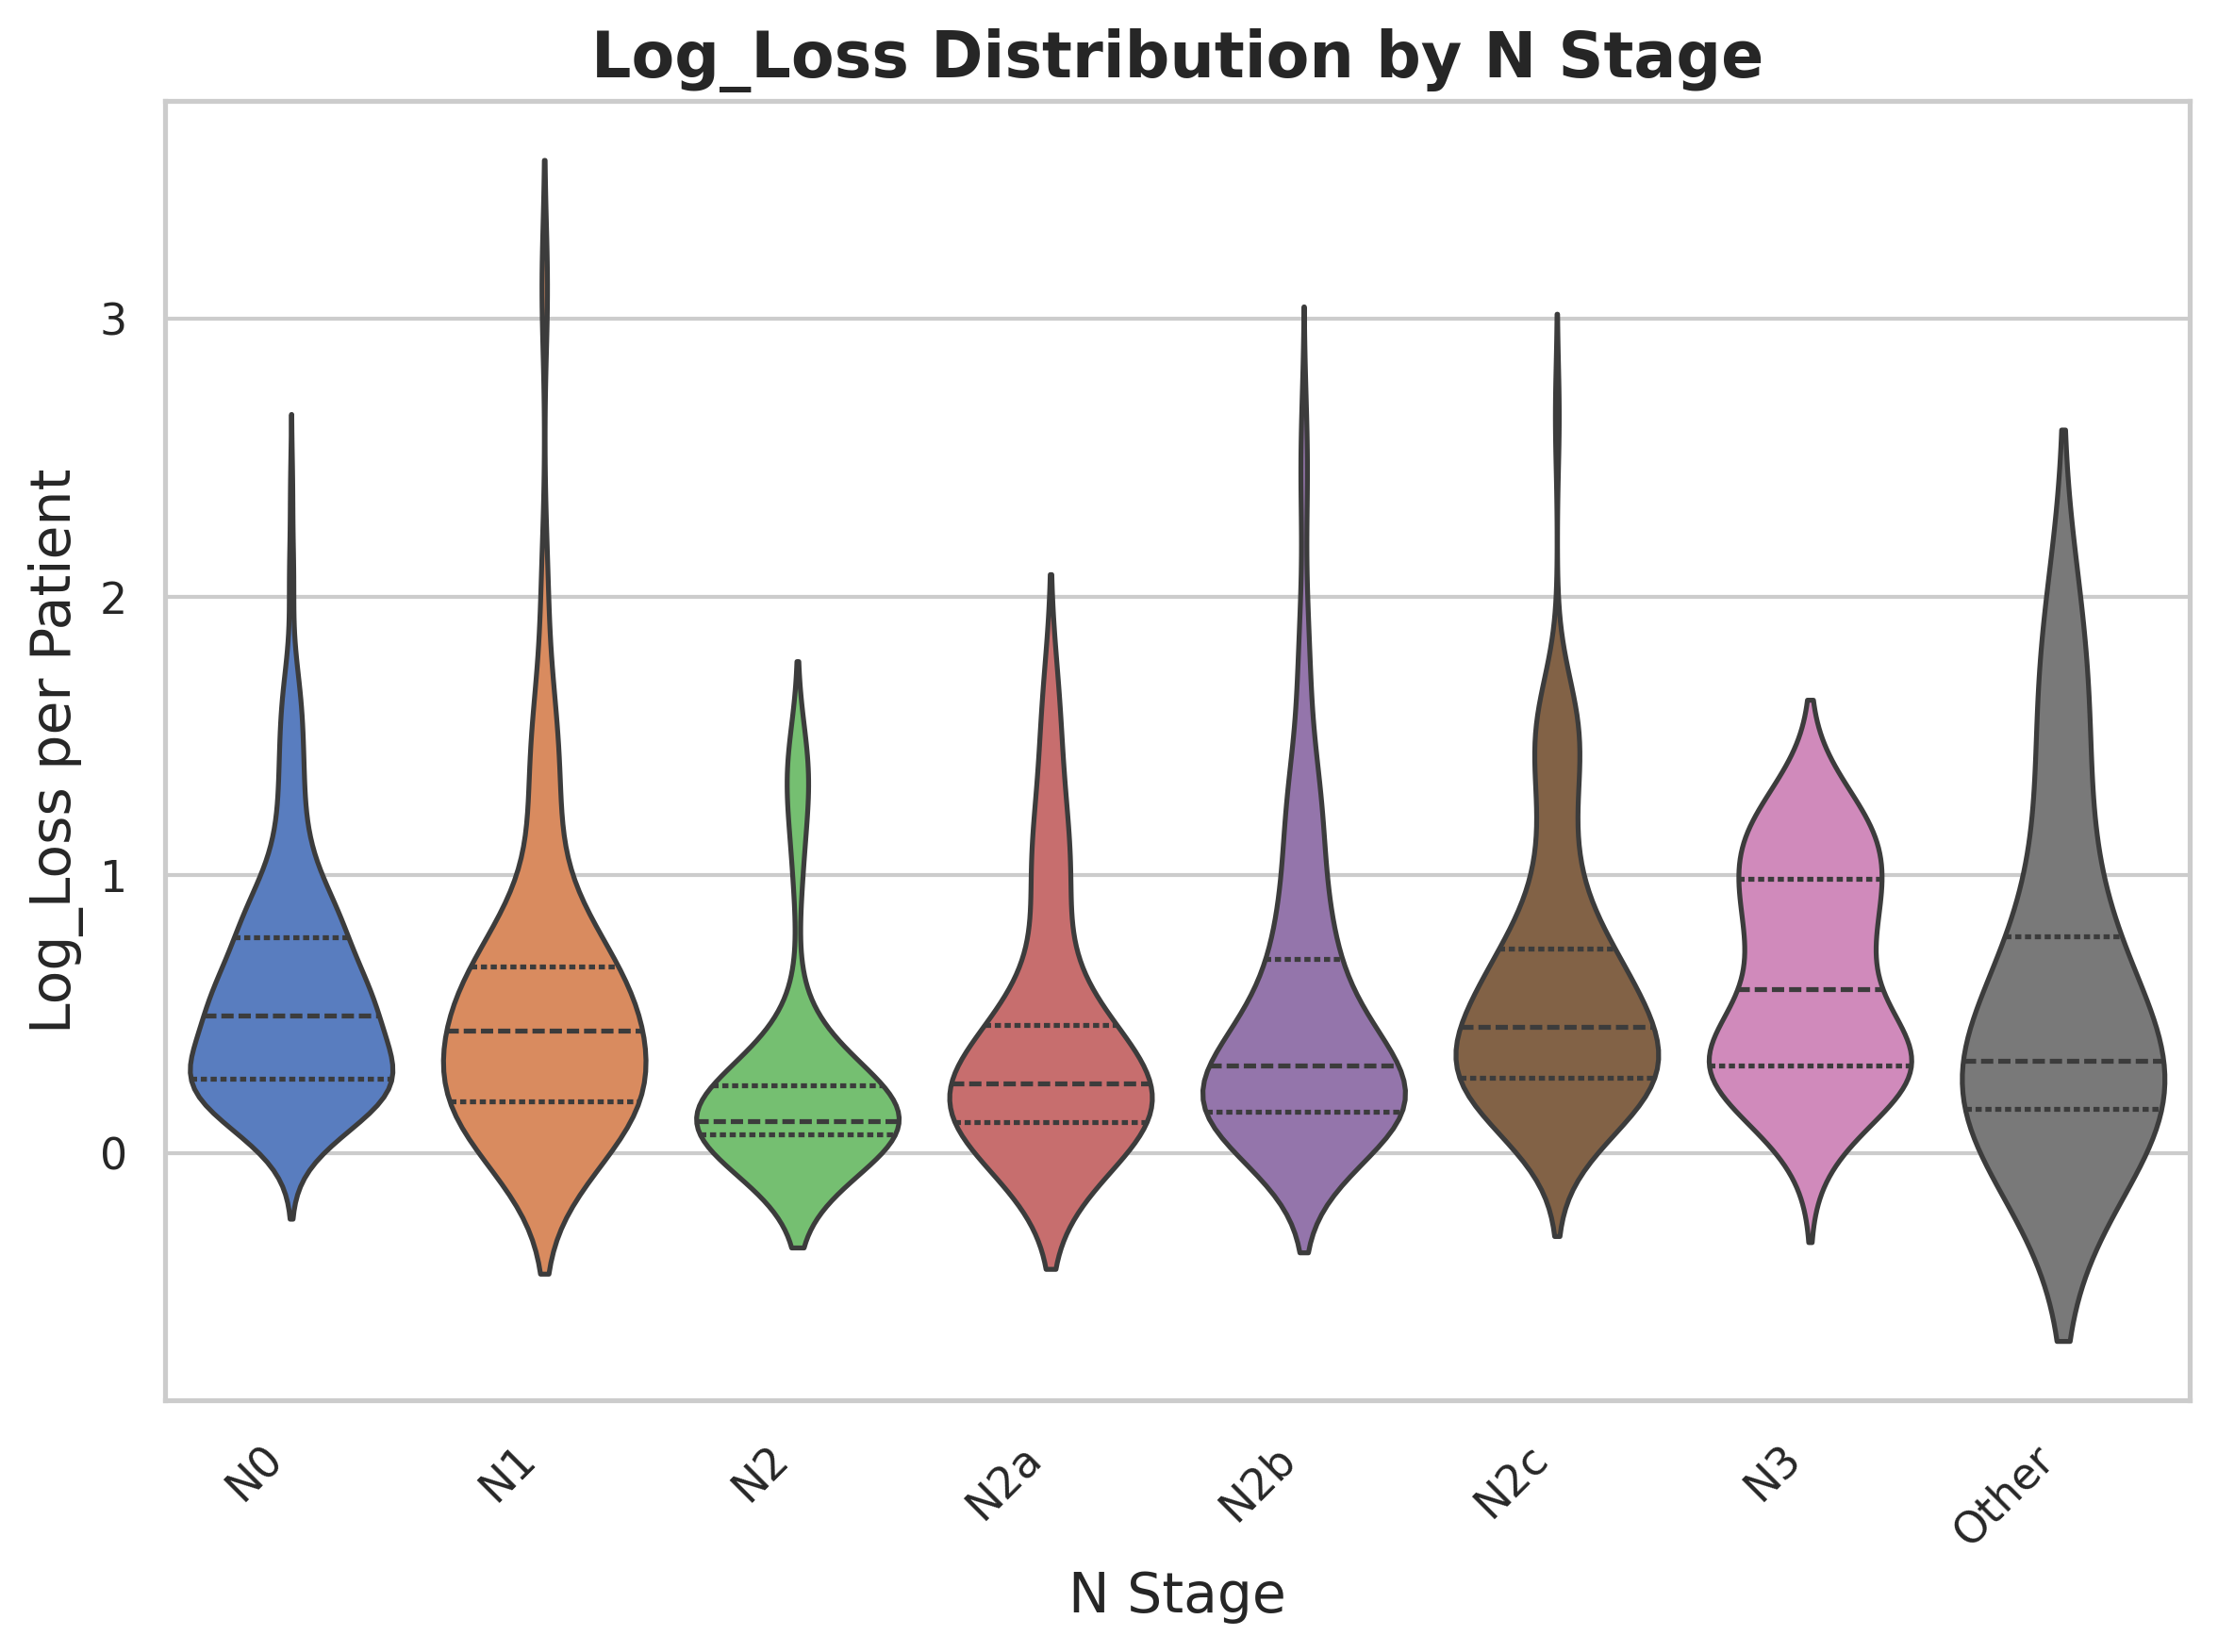


=== Subgroup Analysis for 'N Stage' using FairLearn ===

    +------------------------------+---------------------+---------------------+----------------------+----------------------+
    |                              | N0                  | N1                  | N2                   | N2a                  |
    +==============================+=====================+=====================+======================+======================+
    | mean_prediction              | 0.1394422310756972  | 0.23880597014925373 | 0.05405405405405406  | 0.10714285714285714  |
    +------------------------------+---------------------+---------------------+----------------------+----------------------+
    | false_positive_rate          | 0.09714285714285714 | 0.09090909090909091 | 0.030303030303030304 | 0.045454545454545456 |
    +------------------------------+---------------------+---------------------+----------------------+----------------------+
    | Relative mean_prediction     | 1.000 ✅         

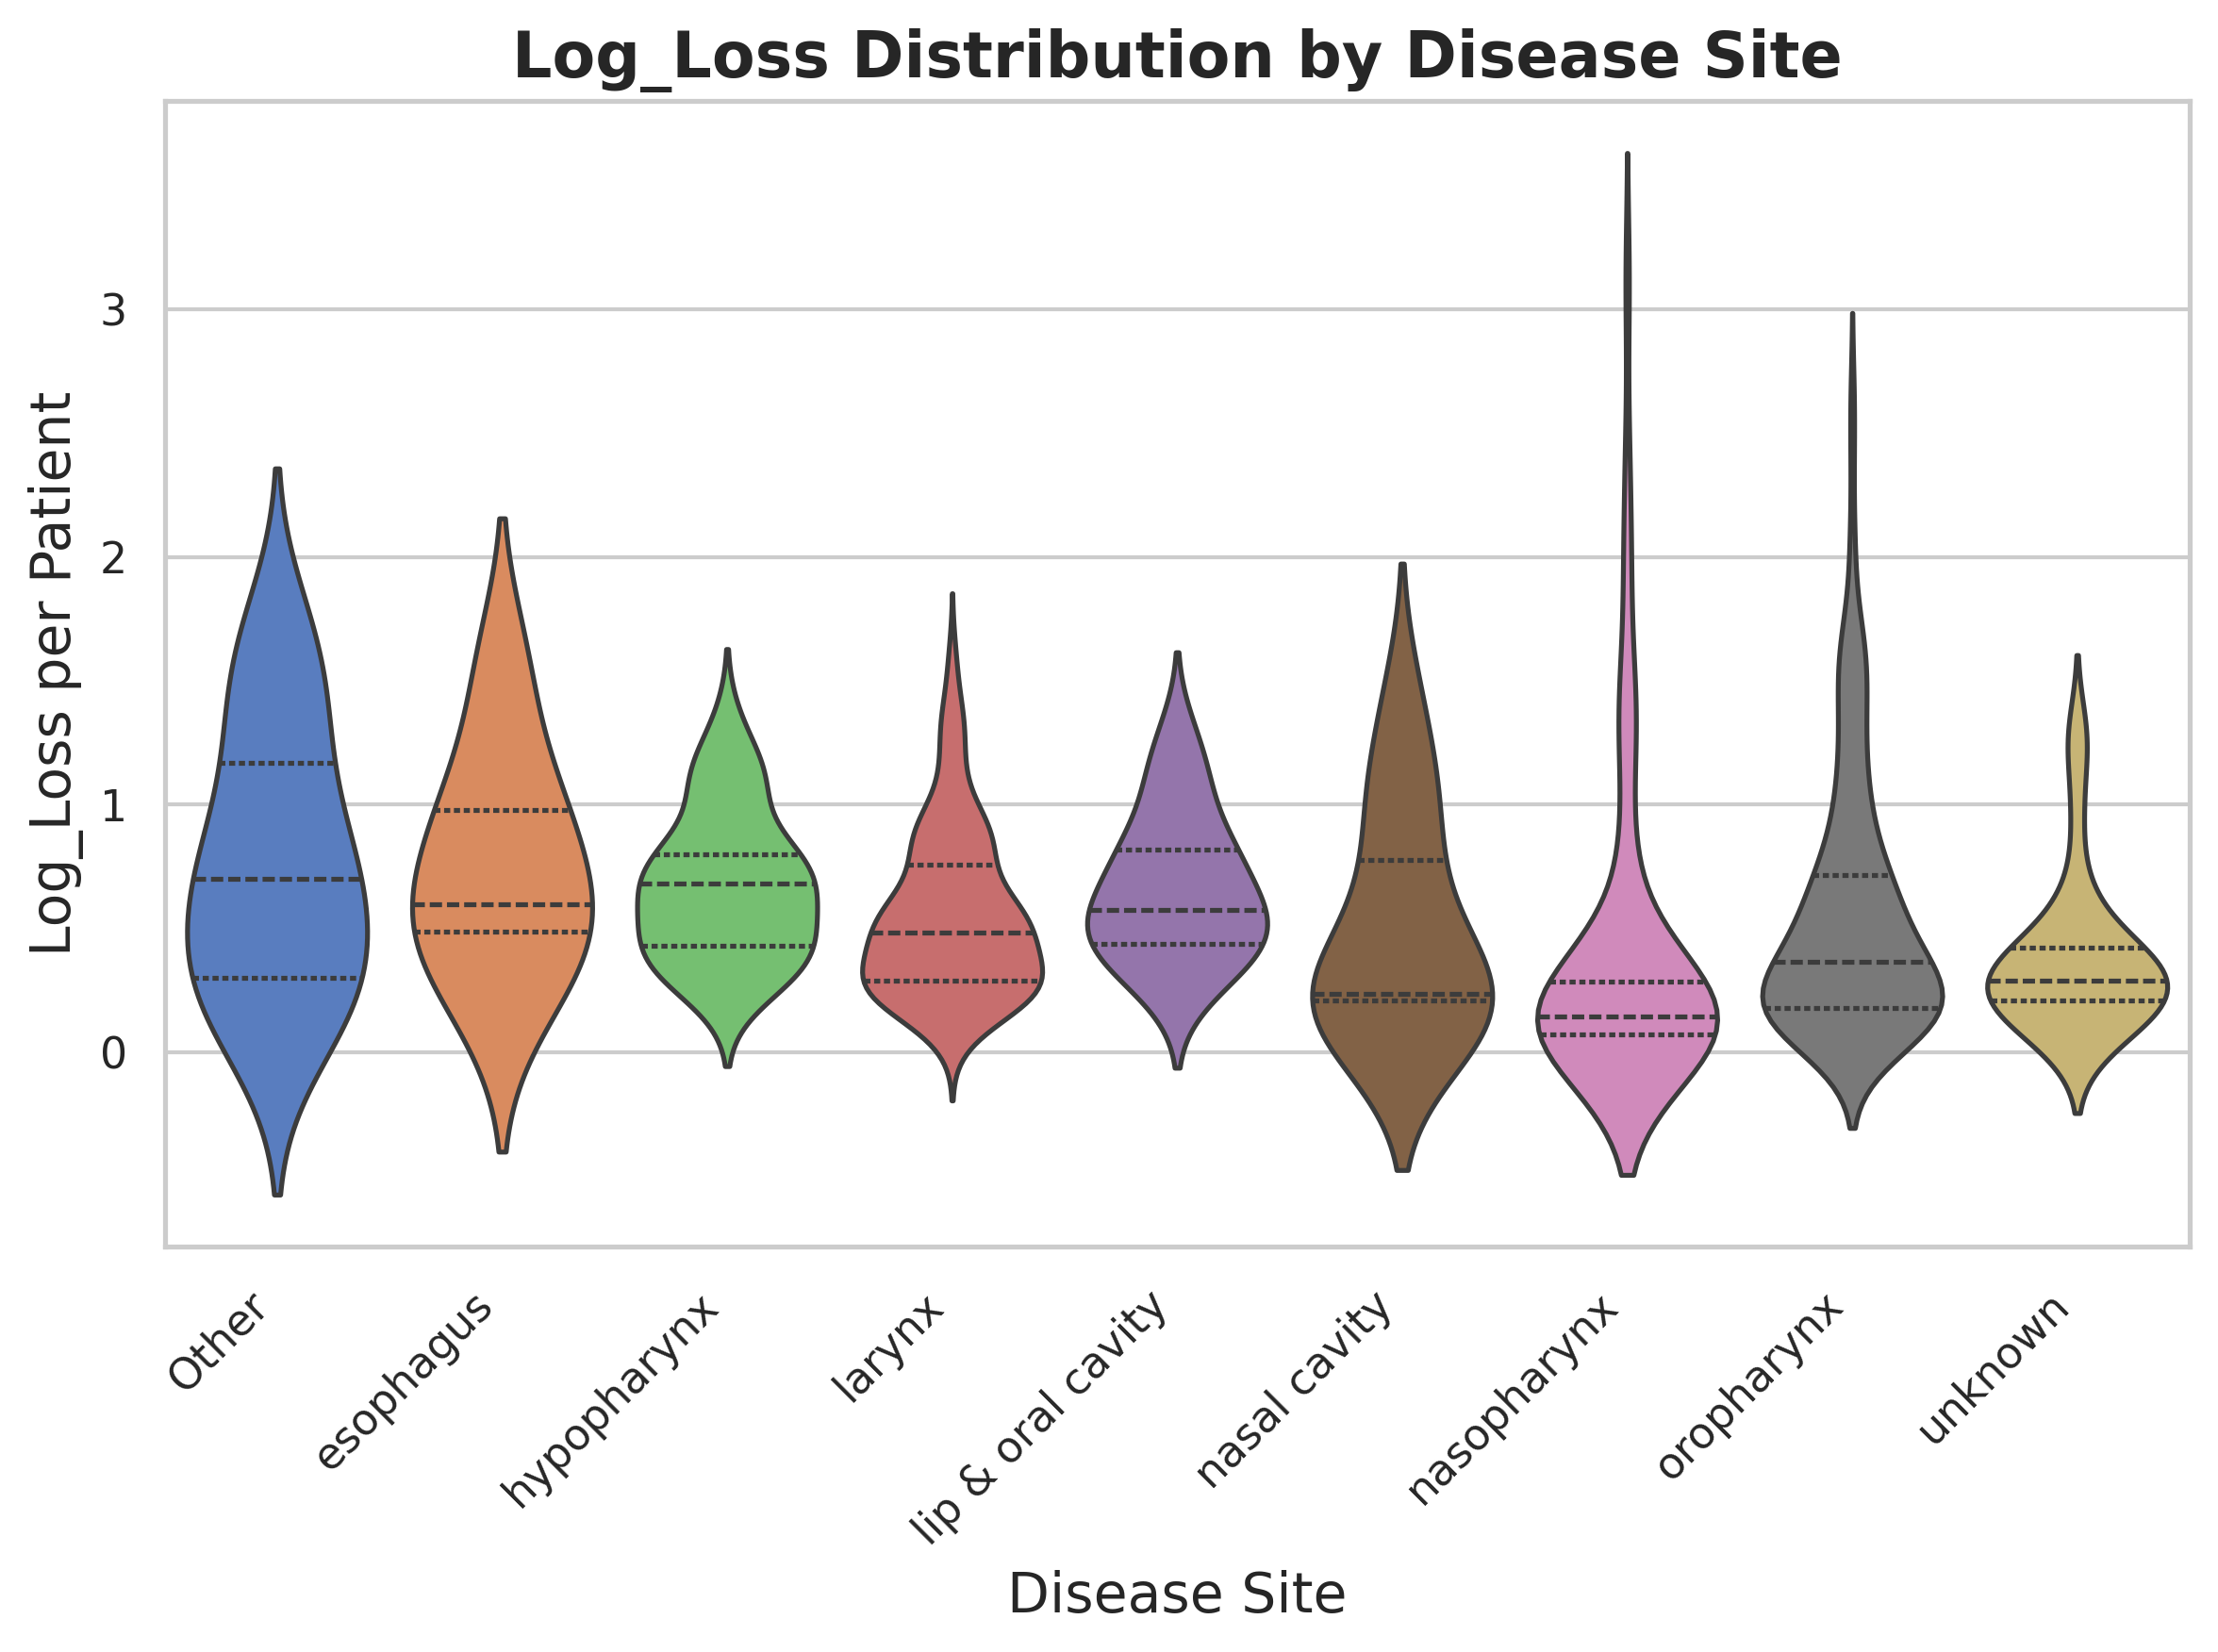


=== Subgroup Analysis for 'Disease Site' using FairLearn ===

    +------------------------------+---------------------+---------------------+--------------------+---------------------+
    |                              | Other               | esophagus           | hypopharynx        | larynx              |
    +==============================+=====================+=====================+====================+=====================+
    | mean_prediction              | 0.1875              | 0.14285714285714285 | 0.5483870967741935 | 0.1891891891891892  |
    +------------------------------+---------------------+---------------------+--------------------+---------------------+
    | false_positive_rate          | 0.14285714285714285 | 0.0                 | 0.4444444444444444 | 0.13970588235294118 |
    +------------------------------+---------------------+---------------------+--------------------+---------------------+
    | Relative mean_prediction     | 0.957 ✅            | 0.729 ✅    

100%|██████████| 100/100 [04:35<00:00,  2.76s/it]


In [4]:
from jarvais.explainer import Explainer

sensitive_features = {k: trainer.X_test[k] for k in ['N Stage', 'Disease Site', 'Sex']}

exp = Explainer.from_trainer(trainer, sensitive_features=sensitive_features)
exp.run()